# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer

from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings


# These becuase we have many features, and we want to display all of them
pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", 30)


plt.rcParams["figure.figsize"] = (7, 4)
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [2]:
df = pd.read_csv("final_scout_not_dummy.csv")
df

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15910,Renault Espace,Van,39950,VAT deductible,1647.363,New,Diesel,6.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300
15911,Renault Espace,Van,39885,VAT deductible,9900.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...",0.000,1.000,165.000,0,Metallic,Cloth,Automatic,1798.000,1708.000,front,7.400
15912,Renault Espace,Van,39875,VAT deductible,15.000,Pre-registered,Diesel,6.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...",0.000,1.000,146.000,1,Metallic,Part/Full Leather,Automatic,1997.000,1734.000,front,5.300
15913,Renault Espace,Van,39700,VAT deductible,10.000,Pre-registered,Diesel,6.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [4]:
df.describe(include="O").T

,count,unique,top,freq
make_model,15915,9,Audi A3,3097
body_type,15915,8,Sedans,8004
vat,15915,2,VAT deductible,15044
Type,15915,5,Used,11095
Fuel,15915,4,Benzine,8548
Comfort_Convenience,15915,6196,"Air conditioning,Electrical side mirrors,Hill ...",388
Entertainment_Media,15915,346,"Bluetooth,Hands-free equipment,On-board comput...",1737
Extras,15915,659,Alloy wheels,5785
Safety_Security,15915,4442,"ABS,Central door lock,Daytime running lights,D...",729
Paint_Type,15915,3,Metallic,15246


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15915.000,18024.381,7381.679,4950.000,12850.000,16900.000,21900.000,74600.000
km,15915.000,32089.996,36977.215,0.000,1920.500,20413.000,46900.000,317000.000
Gears,15915.000,5.937,0.705,5.000,5.000,6.000,6.000,8.000
age,15915.000,1.390,1.121,0.000,0.000,1.000,2.000,3.000
Previous_Owners,15915.000,1.043,0.339,0.000,1.000,1.000,1.000,4.000
hp_kW,15915.000,88.499,26.674,40.000,66.000,85.000,103.000,294.000
Inspection_new,15915.000,0.247,0.431,0.000,0.000,0.000,0.000,1.000
Displacement_cc,15915.000,1428.662,275.804,890.000,1229.000,1461.000,1598.000,2967.000
Weight_kg,15915.000,1337.701,199.682,840.000,1165.000,1295.000,1472.000,2471.000
cons_comb,15915.000,4.832,0.868,3.000,4.100,4.800,5.400,9.100


In [6]:
df.Previous_Owners.value_counts()

Previous_Owners
1.000    14158
2.000     1172
0.000      554
3.000       29
4.000        2
Name: count, dtype: int64

In [7]:
# Check duplicates
df.duplicated().sum()

1673

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

make_model             0
body_type              0
price                  0
vat                    0
km                     0
Type                   0
Fuel                   0
Gears                  0
Comfort_Convenience    0
Entertainment_Media    0
Extras                 0
Safety_Security        0
age                    0
Previous_Owners        0
hp_kW                  0
Inspection_new         0
Paint_Type             0
Upholstery_type        0
Gearing_Type           0
Displacement_cc        0
Weight_kg              0
Drive_chain            0
cons_comb              0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
# df["Gears"] = df.Gears.astype("O")
# df["Previous_Owners"] = df.Previous_Owners.astype("O")
# df["Inspection_new"] = df.Previous_Owners.astype("O")

# df.info()

In [12]:
df.describe(include="O").T

,count,unique,top,freq
make_model,14242,9,Audi A3,2758
body_type,14242,8,Sedans,7230
vat,14242,2,VAT deductible,13426
Type,14242,5,Used,10172
Fuel,14242,4,Benzine,7558
Comfort_Convenience,14242,6196,"Air conditioning,Electrical side mirrors,Hill ...",312
Entertainment_Media,14242,346,"Bluetooth,Hands-free equipment,On-board comput...",1562
Extras,14242,659,Alloy wheels,5010
Safety_Security,14242,4442,"ABS,Central door lock,Daytime running lights,D...",635
Paint_Type,14242,3,Metallic,13682


In [13]:
df.corr(numeric_only= True)

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
price,1.000,-0.402,0.528,-0.481,-0.149,0.698,0.003,0.287,0.460,0.274
km,-0.402,1.000,-0.038,0.749,0.159,0.013,-0.036,0.306,0.153,-0.295
Gears,0.528,-0.038,1.000,-0.079,-0.037,0.451,-0.006,0.338,0.332,0.007
age,-0.481,0.749,-0.079,1.000,0.314,-0.093,-0.024,0.198,0.061,-0.339
Previous_Owners,-0.149,0.159,-0.037,0.314,1.000,-0.032,0.037,0.030,0.004,-0.033
hp_kW,0.698,0.013,0.451,-0.093,-0.032,1.000,0.045,0.606,0.641,0.391
Inspection_new,0.003,-0.036,-0.006,-0.024,0.037,0.045,1.000,-0.024,-0.041,0.142
Displacement_cc,0.287,0.306,0.338,0.198,0.030,0.606,-0.024,1.000,0.567,0.055
Weight_kg,0.460,0.153,0.332,0.061,0.004,0.641,-0.041,0.567,1.000,0.089
cons_comb,0.274,-0.295,0.007,-0.339,-0.033,0.391,0.142,0.055,0.089,1.000


Detecting outliers

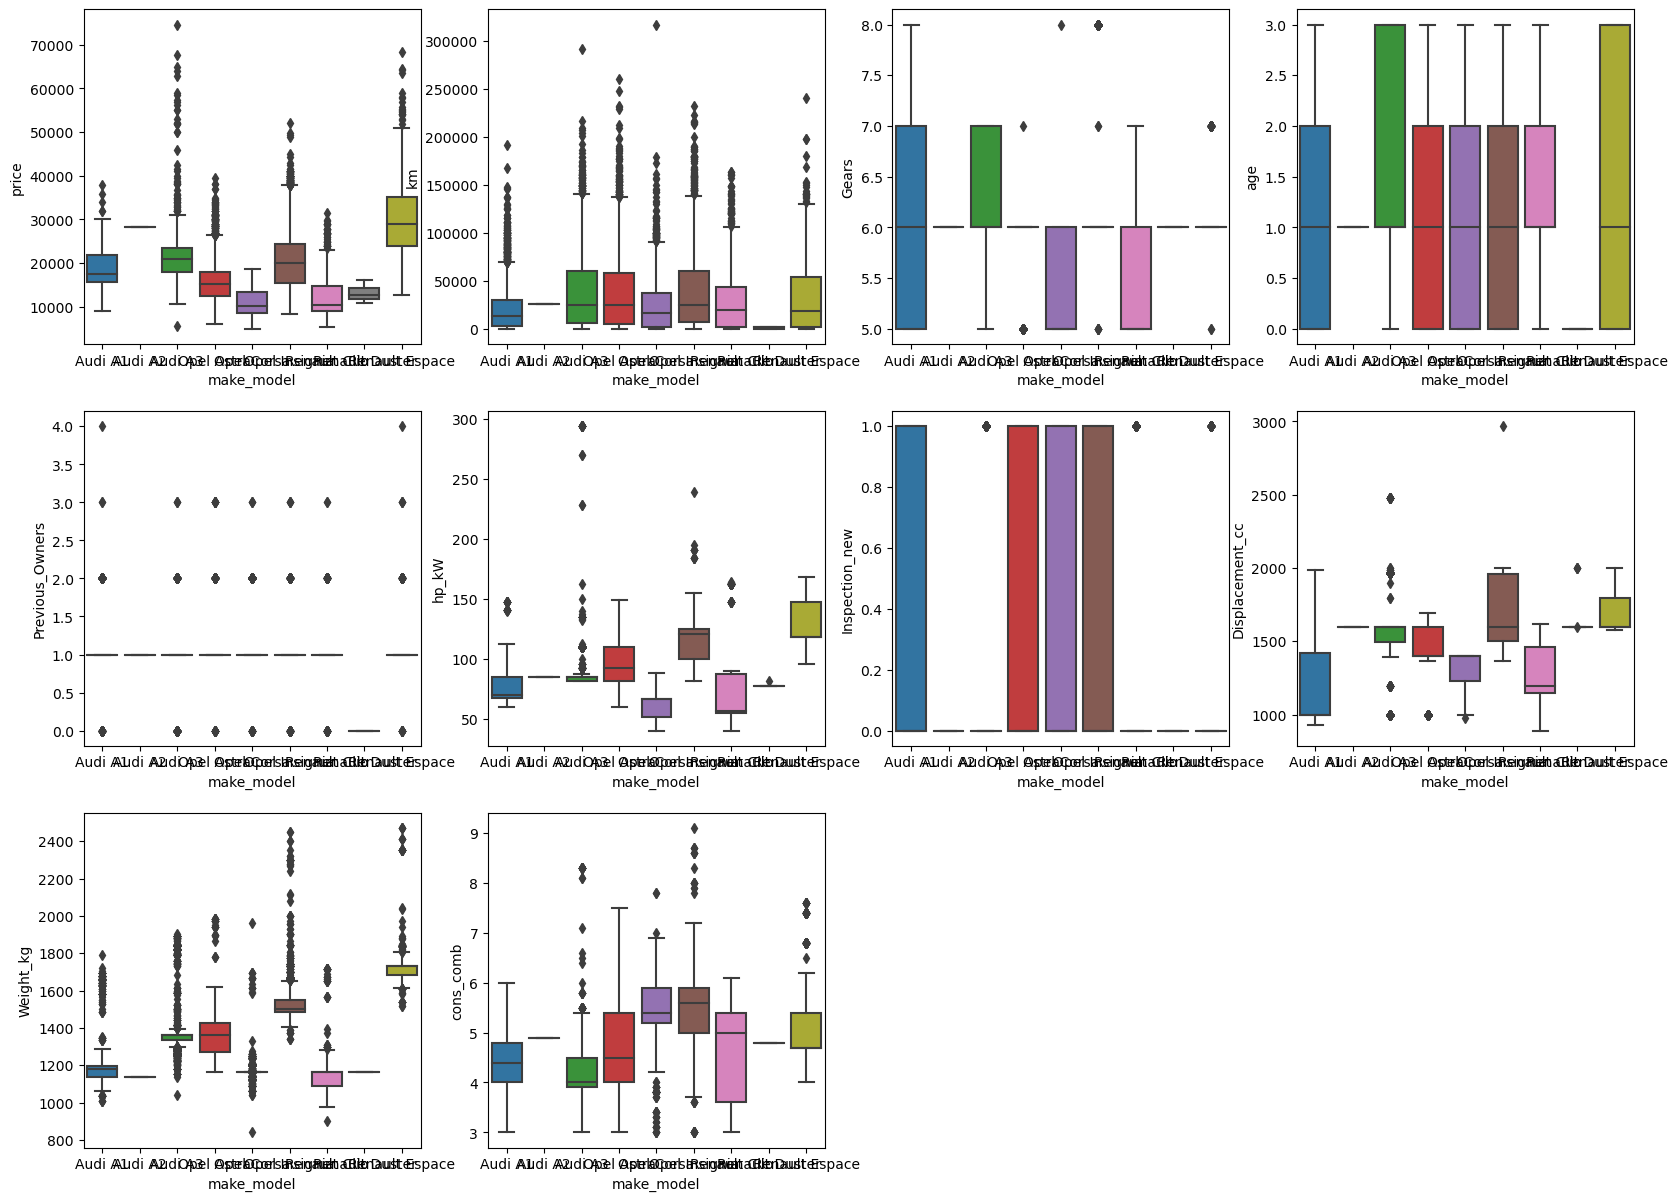

In [14]:
# Box plots

index = 0
plt.figure(figsize=(20,20))
for feature in df.select_dtypes("number"):
    if feature != "make_model":
        index += 1
        plt.subplot(4,4,index)
        sns.boxplot(x='make_model',y=feature,data=df)

# from box plots, we can have same insight as the pair plot

<Axes: xlabel='make_model', ylabel='price'>

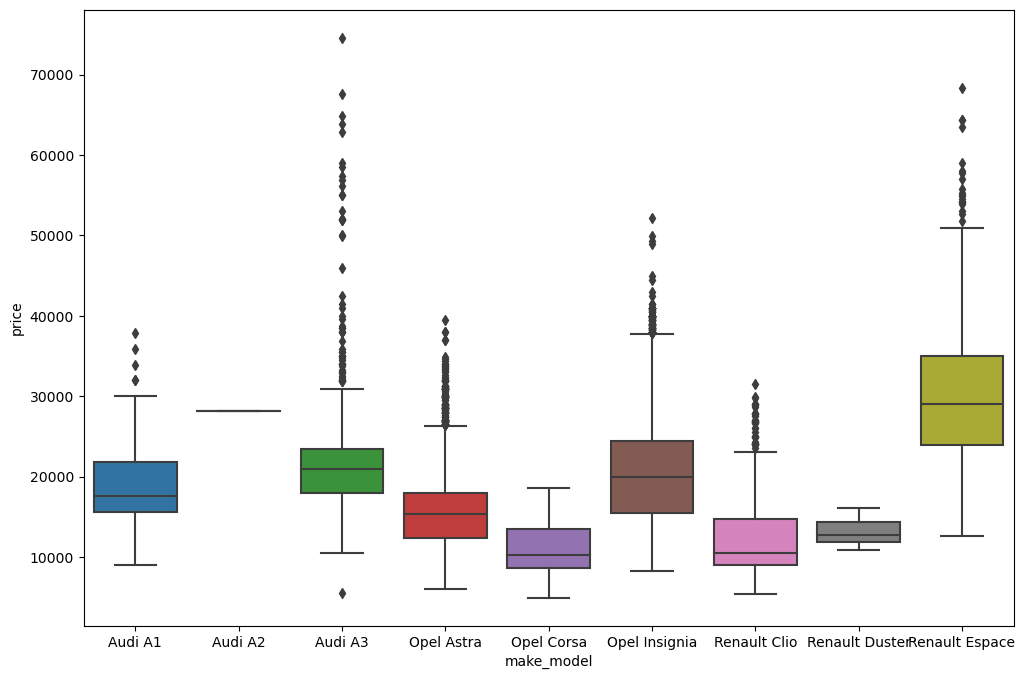

In [15]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,
                y="price",
                x="make_model",
               )

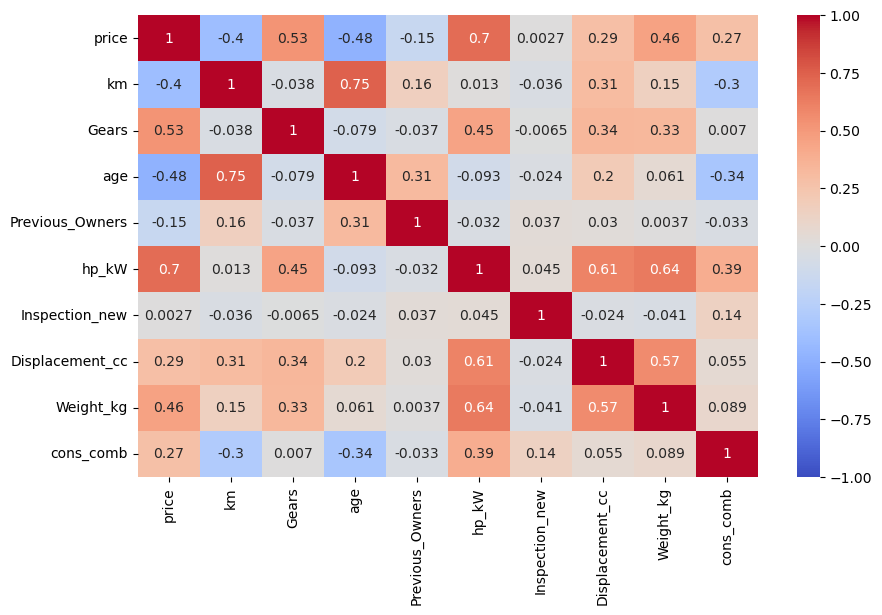

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot =True, cmap="coolwarm");

## VIF

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
df.corr(numeric_only= True).columns.tolist()

['price',
 'km',
 'Gears',
 'age',
 'Previous_Owners',
 'hp_kW',
 'Inspection_new',
 'Displacement_cc',
 'Weight_kg',
 'cons_comb']

In [19]:
numeric_columns =  df.corr(numeric_only= True).columns.tolist()[1:]

In [20]:
vif_data = pd.DataFrame()
predictors = numeric_columns
vif_data["Variable"] = predictors

In [21]:
# Calculate VIF scores for each predictor
vif_data["VIF"] = [
    variance_inflation_factor(df[numeric_columns].values, i) for i in range(len(predictors))
]

In [22]:
vif_data

,Variable,VIF
0,km,4.438
1,Gears,55.935
2,age,6.812
3,Previous_Owners,11.584
4,hp_kW,25.389
5,Inspection_new,1.382
6,Displacement_cc,53.450
7,Weight_kg,71.404
8,cons_comb,30.188


In [23]:
numeric_columns.remove('Weight_kg')

In [24]:
numeric_columns

['km',
 'Gears',
 'age',
 'Previous_Owners',
 'hp_kW',
 'Inspection_new',
 'Displacement_cc',
 'cons_comb']

In [25]:
vif_data = pd.DataFrame()
predictors = numeric_columns
vif_data["Variable"] = predictors

In [26]:

vif_data["VIF"] = [
    variance_inflation_factor(df[numeric_columns].values, i) for i in range(len(predictors))
]

In [27]:
vif_data


,Variable,VIF
0,km,4.430
1,Gears,45.707
2,age,6.798
3,Previous_Owners,11.481
4,hp_kW,23.298
5,Inspection_new,1.377
6,Displacement_cc,47.554
7,cons_comb,29.247


# EDA

In [28]:
df.Extras

0           Alloy wheels,Catalytic Converter,Voice Control
1        Alloy wheels,Sport seats,Sport suspension,Voic...
2                               Alloy wheels,Voice Control
3                   Alloy wheels,Sport seats,Voice Control
4        Alloy wheels,Sport package,Sport suspension,Vo...
                               ...                        
15907              Alloy wheels,Touch screen,Voice Control
15908                            Alloy wheels,Touch screen
15909    Alloy wheels,Catalytic Converter,Sport suspens...
15911              Alloy wheels,Touch screen,Voice Control
15912                                         Alloy wheels
Name: Extras, Length: 14242, dtype: object

In [29]:
df.Extras = df.Extras.apply(lambda x: len(x.split(',')))

In [30]:
df.Extras = df.Extras.astype("O")

In [31]:
from collections import Counter

def get_word_frequencies(column_data):
    # Concatenate all text in the column into a single string
    full_text = ' '.join(column_data.astype(str).tolist())

    # Tokenize the text into words (you might need a more advanced tokenizer based on your requirements)
    words = full_text.split(",")

    # Count the frequency of each word
    word_frequencies = Counter(words)

    return word_frequencies

# Example usage:
import pandas as pd



# Get word frequencies for the 'text_column'
word_frequencies = get_word_frequencies(df['Comfort_Convenience'])

# Print the unique words and their frequencies
for word, frequency in word_frequencies.items():
    print(f'{word}: {frequency}')

Air conditioning: 1
Armrest: 6916
Automatic climate control: 8384
Cruise control: 10065
Electrical side mirrors: 11225
Hill Holder: 6375
Leather steering wheel: 8861
Light sensor: 7334
Multi-function steering wheel: 10603
Navigation system: 7714
Park Distance Control: 9616
Parking assist system sensors rear: 9134
Power windows: 11244
Rain sensor: 7598
Seat heating: 5447
Start-stop system Air conditioning: 6986
Lumbar support: 3235
Start-stop system: 1150
Tinted windows Air conditioning: 1311
Parking assist system sensors front: 5736
Start-stop system Air suspension: 1
Auxiliary heating: 227
Heads-up display: 573
Split rear seats: 1638
Keyless central door lock: 2352
Power windows Air conditioning: 1885
Split rear seats Air conditioning: 664
Rain sensor Air conditioning: 616
Electrically heated windshield: 885
Seat ventilation: 740
Wind deflector Air conditioning: 39
Automatic climate control Air conditioning: 24
Tinted windows Leather steering wheel: 2
Start-stop system Armrest: 53
Sta

In [32]:
from collections import Counter

def get_word_frequencies(column_data):
    # Concatenate all text in the column into a single string
    full_text = ' '.join(column_data.astype(str).tolist())

    # Tokenize the text into words (you might need a more advanced tokenizer based on your requirements)
    words = full_text.split(",")

    # Count the frequency of each word
    word_frequencies = Counter(words)

    return word_frequencies

# Example usage:
import pandas as pd



# Get word frequencies for the 'text_column'
word_frequencies = get_word_frequencies(df['Entertainment_Media'])

# Print the unique words and their frequencies
for word, frequency in word_frequencies.items():
    print(f'{word}: {frequency}')

Bluetooth: 1
Hands-free equipment: 8933
On-board computer: 10118
Radio Bluetooth: 2814
Radio: 7647
Sound system MP3: 9
On-board computer Bluetooth: 548
CD player: 3959
MP3: 5577
Sound system: 1466
USB Bluetooth: 6570
USB CD player: 286
Radio Radio Radio Bluetooth: 16
USB Radio Bluetooth: 157
Digital radio: 1905
USB Radio: 24
Sound system Bluetooth: 376
USB Radio Radio Bluetooth: 18
Radio On-board computer: 206
Radio CD player: 209
Radio Radio Bluetooth: 100
CD player Bluetooth: 9
Radio Radio On-board computer: 9
Radio CD player CD player: 3
Radio MP3: 42
Radio CD player On-board computer: 1
USB On-board computer: 241
Sound system CD player Bluetooth: 2
On-board computer Hands-free equipment: 13
MP3 Bluetooth: 9
Sound system Radio Bluetooth: 16
USB Radio CD player: 11
Radio Radio CD player: 7
MP3 Hands-free equipment: 1
Sound system CD player: 25
On-board computer CD player: 28
Radio On-board computer Bluetooth: 60
USB On-board computer Bluetooth: 197
USB MP3: 50
Hands-free equipment Bl

In [33]:
from collections import Counter

def get_word_frequencies(column_data):
    # Concatenate all text in the column into a single string
    full_text = ' '.join(column_data.astype(str).tolist())

    # Tokenize the text into words (you might need a more advanced tokenizer based on your requirements)
    words = full_text.split(",")

    # Count the frequency of each word
    word_frequencies = Counter(words)

    return word_frequencies

# Example usage:
import pandas as pd



# Get word frequencies for the 'text_column'
word_frequencies = get_word_frequencies(df['Safety_Security'])

# Print the unique words and their frequencies
for word, frequency in word_frequencies.items():
    print(f'{word}: {frequency}')

ABS: 1
Central door lock: 11915
Daytime running lights: 10015
Driver-side airbag: 13385
Electronic stability control: 12597
Fog lights: 7954
Immobilizer: 10193
Isofix: 11209
Passenger-side airbag: 12979
Power steering: 12725
Side airbag: 11758
Tire pressure monitoring system: 9008
Traction control: 4071
Xenon headlights ABS: 3273
Central door lock with remote control: 2341
Head airbag: 2100
Traction control ABS: 6397
Alarm system: 1781
Driver drowsiness detection: 472
Emergency system: 1454
Tire pressure monitoring system ABS: 1170
LED Headlights: 2931
Adaptive headlights: 1942
Traction control Central door lock: 105
Side airbag ABS: 803
LED Daytime Running Lights: 5331
Xenon headlights Alarm system: 23
Rear airbag: 852
Power steering ABS: 261
Passenger-side airbag ABS: 37
Xenon headlights Central door lock: 66
Traction control Daytime running lights: 31
Emergency brake assistant: 3042
Tire pressure monitoring system Central door lock: 28
Adaptive Cruise Control: 1219
Night view assist

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14242 entries, 0 to 15912
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           14242 non-null  object 
 1   body_type            14242 non-null  object 
 2   price                14242 non-null  int64  
 3   vat                  14242 non-null  object 
 4   km                   14242 non-null  float64
 5   Type                 14242 non-null  object 
 6   Fuel                 14242 non-null  object 
 7   Gears                14242 non-null  float64
 8   Comfort_Convenience  14242 non-null  object 
 9   Entertainment_Media  14242 non-null  object 
 10  Extras               14242 non-null  object 
 11  Safety_Security      14242 non-null  object 
 12  age                  14242 non-null  float64
 13  Previous_Owners      14242 non-null  float64
 14  hp_kW                14242 non-null  float64
 15  Inspection_new       14242 non-null  int6

In [35]:
df.Entertainment_Media = df.Entertainment_Media.apply(lambda x: len(x.split(',')))
df.Entertainment_Media = df.Entertainment_Media.astype("O")

In [40]:
df.Safety_Security = df.Safety_Security.apply(lambda x: len(x.split(',')))
df.Safety_Security = df.Safety_Security.astype("O")

In [41]:
df.Comfort_Convenience = df.Comfort_Convenience.apply(lambda x: len(x.split(',')))
df.Comfort_Convenience = df.Comfort_Convenience.astype("O")

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14242 entries, 0 to 15912
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           14242 non-null  object 
 1   body_type            14242 non-null  object 
 2   price                14242 non-null  int64  
 3   vat                  14242 non-null  object 
 4   km                   14242 non-null  float64
 5   Type                 14242 non-null  object 
 6   Fuel                 14242 non-null  object 
 7   Gears                14242 non-null  float64
 8   Comfort_Convenience  14242 non-null  object 
 9   Entertainment_Media  14242 non-null  object 
 10  Extras               14242 non-null  object 
 11  Safety_Security      14242 non-null  object 
 12  age                  14242 non-null  float64
 13  Previous_Owners      14242 non-null  float64
 14  hp_kW                14242 non-null  float64
 15  Inspection_new       14242 non-null  int6

<Axes: xlabel='Comfort_Convenience', ylabel='price'>

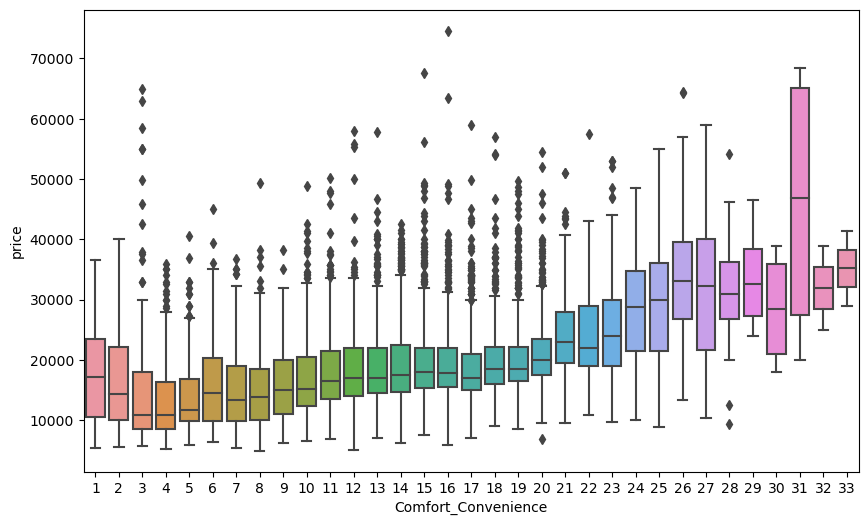

In [43]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,
                y="price",
                x="Comfort_Convenience"
               )

<Axes: xlabel='Extras', ylabel='price'>

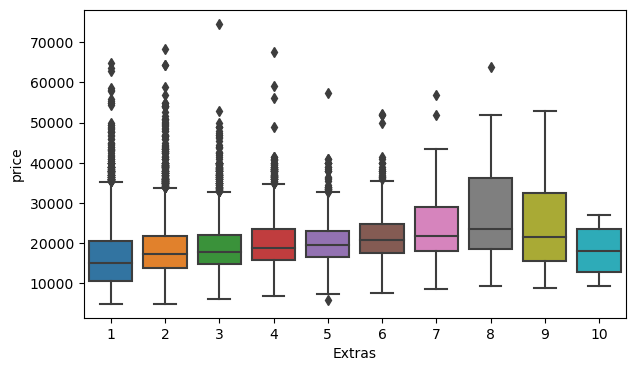

In [44]:
sns.boxplot(data=df,
                y="price",
                x="Extras"
               )

<Axes: xlabel='Entertainment_Media', ylabel='price'>

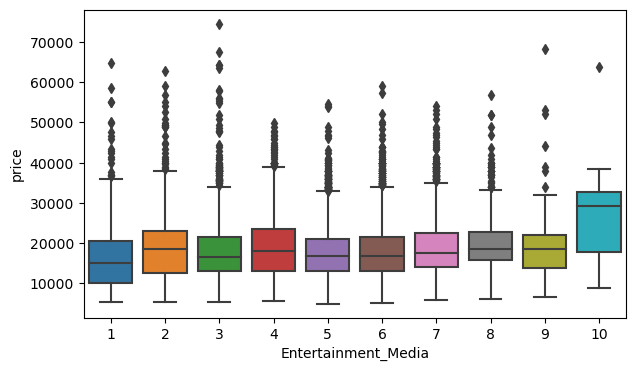

In [45]:
sns.boxplot(data=df,
                y="price",
                x="Entertainment_Media"
               )

<Axes: xlabel='Safety_Security', ylabel='price'>

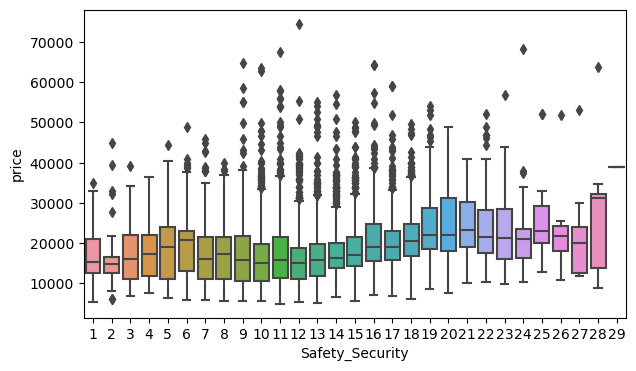

In [46]:
sns.boxplot(data=df,
                y="price",
                x="Safety_Security"
               )

<Axes: xlabel='Inspection_new', ylabel='price'>

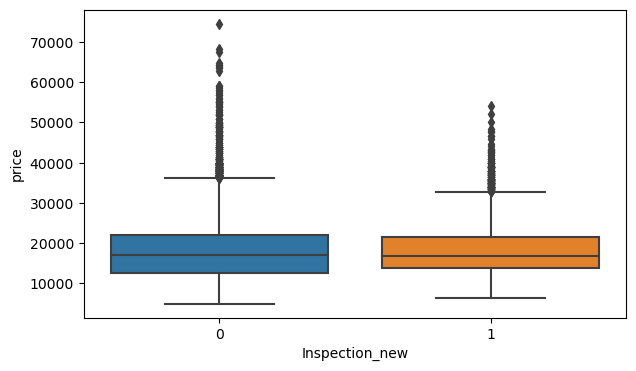

In [47]:
sns.boxplot(data=df,
                y="price",
                x="Inspection_new"
               )

In [48]:
df

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,16,4,3,14,3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,9,5,4,15,2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,13,2,2,12,3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,16,8,3,14,3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,13,7,4,13,3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15907,Renault Espace,Van,39980,VAT deductible,100.000,Pre-registered,Diesel,6.000,27,7,3,18,0.000,1.000,118.000,0,Metallic,Part/Full Leather,Automatic,1598.000,1734.000,front,4.700
15908,Renault Espace,Van,39950,VAT deductible,1647.363,New,Diesel,6.000,20,6,2,19,0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300
15909,Renault Espace,Van,39950,VAT deductible,1000.000,Demonstration,Benzine,6.000,26,7,5,19,0.000,1.000,165.000,0,Metallic,Part/Full Leather,Automatic,1798.000,1734.000,front,6.800
15911,Renault Espace,Van,39885,VAT deductible,9900.000,Used,Benzine,7.000,23,5,3,19,0.000,1.000,165.000,0,Metallic,Cloth,Automatic,1798.000,1708.000,front,7.400


In [ ]:
df.vat.value_counts()

In [49]:
df.drop(["vat"], axis = 1,inplace=True) # Husam's edit removed Displacement_cc
df

,make_model,body_type,price,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,56013.000,Used,Diesel,7.000,16,4,3,14,3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,80000.000,Used,Benzine,7.000,9,5,4,15,2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,83450.000,Used,Diesel,7.000,13,2,2,12,3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,73000.000,Used,Diesel,6.000,16,8,3,14,3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,16200.000,Used,Diesel,7.000,13,7,4,13,3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15907,Renault Espace,Van,39980,100.000,Pre-registered,Diesel,6.000,27,7,3,18,0.000,1.000,118.000,0,Metallic,Part/Full Leather,Automatic,1598.000,1734.000,front,4.700
15908,Renault Espace,Van,39950,1647.363,New,Diesel,6.000,20,6,2,19,0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300
15909,Renault Espace,Van,39950,1000.000,Demonstration,Benzine,6.000,26,7,5,19,0.000,1.000,165.000,0,Metallic,Part/Full Leather,Automatic,1798.000,1734.000,front,6.800
15911,Renault Espace,Van,39885,9900.000,Used,Benzine,7.000,23,5,3,19,0.000,1.000,165.000,0,Metallic,Cloth,Automatic,1798.000,1708.000,front,7.400


In [50]:
# you may think of divide it into 2 variables:  1 --> [New, Used ]         2 ---> the other 3 classes
df.Type.value_counts()

Type
Used              10172
New                1369
Pre-registered     1029
Employee's car      905
Demonstration       767
Name: count, dtype: int64

In [51]:
df.Drive_chain.value_counts()

Drive_chain
front    14067
4WD        171
rear         4
Name: count, dtype: int64

# Modeling

In [52]:
df.describe(include="O").columns

Index(['make_model', 'body_type', 'Type', 'Fuel', 'Comfort_Convenience',
       'Entertainment_Media', 'Extras', 'Safety_Security', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain'],
      dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14242 entries, 0 to 15912
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           14242 non-null  object 
 1   body_type            14242 non-null  object 
 2   price                14242 non-null  int64  
 3   km                   14242 non-null  float64
 4   Type                 14242 non-null  object 
 5   Fuel                 14242 non-null  object 
 6   Gears                14242 non-null  float64
 7   Comfort_Convenience  14242 non-null  object 
 8   Entertainment_Media  14242 non-null  object 
 9   Extras               14242 non-null  object 
 10  Safety_Security      14242 non-null  object 
 11  age                  14242 non-null  float64
 12  Previous_Owners      14242 non-null  float64
 13  hp_kW                14242 non-null  float64
 14  Inspection_new       14242 non-null  int64  
 15  Paint_Type           14242 non-null  obje

In [54]:
df.Gears.value_counts()

Gears
6.000    7764
5.000    3771
7.000    2504
8.000     203
Name: count, dtype: int64

In [55]:

cat_ordinal = ['Type','make_model', 'body_type', 'Fuel', 'Upholstery_type', 'Gearing_Type', 'Drive_chain', 'Paint_Type',"Entertainment_Media","Extras","Safety_Security","Comfort_Convenience"]



In [56]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

ord_enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
column_trans = make_column_transformer((ord_enc, cat_ordinal), remainder="passthrough")


In [57]:
y = df.price
X = df.drop("price", axis=1)
print(y)
display(X)

0        15770
1        14500
2        14640
3        14500
4        16790
         ...  
15907    39980
15908    39950
15909    39950
15911    39885
15912    39875
Name: price, Length: 14242, dtype: int64


,make_model,body_type,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,56013.000,Used,Diesel,7.000,16,4,3,14,3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,80000.000,Used,Benzine,7.000,9,5,4,15,2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,83450.000,Used,Diesel,7.000,13,2,2,12,3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,73000.000,Used,Diesel,6.000,16,8,3,14,3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16200.000,Used,Diesel,7.000,13,7,4,13,3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15907,Renault Espace,Van,100.000,Pre-registered,Diesel,6.000,27,7,3,18,0.000,1.000,118.000,0,Metallic,Part/Full Leather,Automatic,1598.000,1734.000,front,4.700
15908,Renault Espace,Van,1647.363,New,Diesel,6.000,20,6,2,19,0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300
15909,Renault Espace,Van,1000.000,Demonstration,Benzine,6.000,26,7,5,19,0.000,1.000,165.000,0,Metallic,Part/Full Leather,Automatic,1798.000,1734.000,front,6.800
15911,Renault Espace,Van,9900.000,Used,Benzine,7.000,23,5,3,19,0.000,1.000,165.000,0,Metallic,Cloth,Automatic,1798.000,1708.000,front,7.400


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
from sklearn.pipeline import Pipeline
operations = [("OneHot_Ordinal_Encoder", column_trans)]

LC_pipe = Pipeline(steps=operations).set_output(transform="pandas")
X_train_transformed = LC_pipe.fit_transform(X_train)
X_test_transformed = LC_pipe.transform(X_test)

# Lazy Predcit

In [158]:
from lazypredict.Supervised import LazyRegressor
from sklearn.pipeline import Pipeline

In [159]:
clf = LazyRegressor(verbose=1, ignore_warnings=True, custom_metric=None)


operations = [("OneHot_Ordinal_Encoder", column_trans)]

LC_pipe = Pipeline(steps=operations).set_output(transform="pandas")

X_train_transformed = LC_pipe.fit_transform(X_train)
X_test_transformed = LC_pipe.transform(X_test)

# If we want the outputs of the given transform algorithms to be dataframes,
# you can add set_output(transform="pandas") to the end of the pipeline.

models,predictions = clf.fit(X_train_transformed, X_test_transformed, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:05<00:00,  7.20it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,


In [160]:
#Creating the eval function to see the metrics
# Pre-defined functions

def eval(model, X_train, y_train, X_test, y_test):
    """This function will help you get regression metrics on both train
    and test set provided.

    Args:
        model : model that is used for prediction
        X_train : Train features
        y_train : Train target
        X_test  : Test features
        y_test  : Test target

    Returns:
        Dataframe : Returns scores dataframe
    """

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}

    return pd.DataFrame(scores)


# Adjusted R2 Score
def adj_r2(y_test, y_pred, X):
    """This function gives adjusted R^2

    Args:
        y_test : Actual target
        y_pred : Predcition
        X : Features

    Returns:
        adj_r2: Adjusted R^2
    """
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2


# Using XGB

In [60]:
from xgboost import XGBRegressor

In [61]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBRegressor(random_state=101)),
]
pipe_model_xgb = Pipeline(steps=operations_xgb)
pipe_model_xgb.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Type', 'make_model',
                                                   'body_type', 'Fuel',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain', 'Paint_Type',
                                                   'Entertainment_Media',
                                                   'Extras', 'Safety_Security',
                                                   'Comfort_Convenience'])])...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=101, ...))])

In [63]:
eval(pipe_model_xgb, X_train, y_train, X_test, y_test)

,train,test
R2,0.984,0.947
mae,683.155,1071.559
mse,875483.068,2971528.492
rmse,935.673,1723.812


In [64]:
df.price.mean()

18100.969456537005

Cross validation

In [65]:

scores = cross_validate(pipe_model_xgb,
                        X_train,
                        y_train,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'],
                        cv = 10,
                        return_train_score=True)

In [66]:
pd.DataFrame(scores)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                    0.945
train_r2                                   0.985
test_neg_mean_absolute_error           -1093.389
train_neg_mean_absolute_error           -663.457
test_neg_mean_squared_error         -3007542.217
train_neg_mean_squared_error         -833490.246
test_neg_root_mean_squared_error       -1730.874
train_neg_root_mean_squared_error       -912.837
dtype: float64

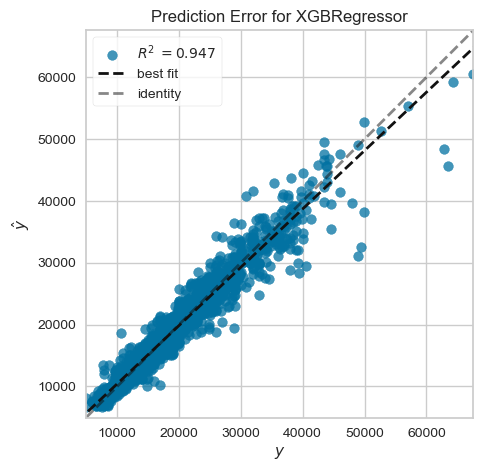

In [67]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(500, 1000))

visualizer = PredictionError(pipe_model_xgb)
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
visualizer.show();

In [68]:
price_50K = df[df['price'] < 50000]

y_50 = price_50K.price
X_50 = price_50K.drop("price", axis=1)

In [69]:
X_50

,make_model,body_type,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,56013.000,Used,Diesel,7.000,16,4,3,14,3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,80000.000,Used,Benzine,7.000,9,5,4,15,2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,83450.000,Used,Diesel,7.000,13,2,2,12,3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,73000.000,Used,Diesel,6.000,16,8,3,14,3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16200.000,Used,Diesel,7.000,13,7,4,13,3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15907,Renault Espace,Van,100.000,Pre-registered,Diesel,6.000,27,7,3,18,0.000,1.000,118.000,0,Metallic,Part/Full Leather,Automatic,1598.000,1734.000,front,4.700
15908,Renault Espace,Van,1647.363,New,Diesel,6.000,20,6,2,19,0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300
15909,Renault Espace,Van,1000.000,Demonstration,Benzine,6.000,26,7,5,19,0.000,1.000,165.000,0,Metallic,Part/Full Leather,Automatic,1798.000,1734.000,front,6.800
15911,Renault Espace,Van,9900.000,Used,Benzine,7.000,23,5,3,19,0.000,1.000,165.000,0,Metallic,Cloth,Automatic,1798.000,1708.000,front,7.400


In [70]:
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(X_50, y_50, test_size=0.2, random_state=42)

In [71]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBRegressor(random_state=101)),
]
pipe_model_xgb_50 = Pipeline(steps=operations_xgb)
pipe_model_xgb_50.fit(X_train_50, y_train_50)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Type', 'make_model',
                                                   'body_type', 'Fuel',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain', 'Paint_Type',
                                                   'Entertainment_Media',
                                                   'Extras', 'Safety_Security',
                                                   'Comfort_Convenience'])])...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=101, ...))])

In [72]:
eval(pipe_model_xgb_50, X_train_50, y_train_50, X_test_50, y_test_50)

,train,test
R2,0.983,0.949
mae,674.430,1028.546
mse,855832.286,2597938.758
rmse,925.112,1611.812


In [73]:
price_50K.price.mean()

17984.009718994297

Cross validation

In [76]:
scores = cross_validate(pipe_model_xgb_50,
                        X_train_50,
                        y_train_50,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'],
                        cv = 10,
                        return_train_score=True)

In [77]:
pd.DataFrame(scores)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                    0.946
train_r2                                   0.984
test_neg_mean_absolute_error           -1084.918
train_neg_mean_absolute_error           -658.267
test_neg_mean_squared_error         -2723349.569
train_neg_mean_squared_error         -817180.193
test_neg_root_mean_squared_error       -1648.682
train_neg_root_mean_squared_error       -903.940
dtype: float64

In [78]:
param_grid = {
    "XGB_model__n_estimators": [20, 40],
    "XGB_model__max_depth": [1, 2],
    "XGB_model__learning_rate": [0.03, 0.05],
    "XGB_model__subsample": [0.8, 1],
    "XGB_model__colsample_bytree": [0.8, 1],
}

In [79]:
operations_xgb = [
    ("Encoder", column_trans),
    ("XGB_model", XGBRegressor(random_state=101)),
]

model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(
    model,
    param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1,
    return_train_score=True,
)

In [80]:
xgb_grid_model.fit(X_train_50, y_train_50)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Type',
                                                                          'make_model',
                                                                          'body_type',
                                                                          'Fuel',
                                                                          'Upholstery_type',
                                                                          'Gearing_Type',
                                                                          'Drive_chain',
                                                                          'Paint_Type',
                                                                          'Entertainment_Media',
                                                                          'Extras',
                                                                          'Safety_Security',
                                                                          'Com...
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=101, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.8, 1],
                         'XGB_model__learning_rate': [0.03, 0.05],
                         'XGB_model__max_depth': [1, 2],
                         'XGB_model__n_estimators': [20, 40],
                         'XGB_model__subsample': [0.8, 1]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [81]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Type', 'make_model',
                                                   'body_type', 'Fuel',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain', 'Paint_Type',
                                                   'Entertainment_Media',
                                                   'Extras', 'Safety_Security',
                                                   'Comfort_Convenience'])])),
                ('XGB...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=2, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=40,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=101, ...))])

In [82]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 0.8,
 'XGB_model__learning_rate': 0.05,
 'XGB_model__max_depth': 2,
 'XGB_model__n_estimators': 40,
 'XGB_model__subsample': 0.8}

In [83]:
eval(xgb_grid_model, X_train_50, y_train_50, X_test_50, y_test_50)

,train,test
R2,0.659,0.646
mae,2977.203,3046.498
mse,17249831.318,17878775.243
rmse,4153.292,4228.330


## RandomForest

In [86]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)

operations = [("encoder", column_trans), ("RF_model", rf)]
pipe_model_rf = Pipeline(steps=operations)
pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Type', 'make_model',
                                                   'body_type', 'Fuel',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain', 'Paint_Type',
                                                   'Entertainment_Media',
                                                   'Extras', 'Safety_Security',
                                                   'Comfort_Convenience'])])),
                ('RF_model', RandomForestRegressor(random_state=42))])

In [ ]:
# pred = pipe_model.predict(X_test)

In [87]:
eval(pipe_model_rf,X_train,y_train,X_test,y_test)

,train,test
R2,0.992,0.945
mae,388.854,1034.459
mse,425288.535,3093881.195
rmse,652.141,1758.943


In [88]:
rf = RandomForestRegressor(random_state=42)
operations = [("encoder", column_trans), ("RF_model", rf)]
pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'],
                        cv = 10,
                        return_train_score=True)

In [89]:
pd.DataFrame(scores)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                    0.944
train_r2                                   0.992
test_neg_mean_absolute_error           -1048.199
train_neg_mean_absolute_error           -394.547
test_neg_mean_squared_error         -3047074.784
train_neg_mean_squared_error         -439496.622
test_neg_root_mean_squared_error       -1742.728
train_neg_root_mean_squared_error       -662.909
dtype: float64

In [94]:
rf = RandomForestRegressor(bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=10,
                           n_estimators=100, max_depth=7)

operations = [("encoder", column_trans), ("RF_model", rf)]
pipe_model_2 = Pipeline(steps=operations)
pipe_model_2.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Type', 'make_model',
                                                   'body_type', 'Fuel',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain', 'Paint_Type',
                                                   'Entertainment_Media',
                                                   'Extras', 'Safety_Security',
                                                   'Comfort_Convenience'])])),
                ('RF_model',
                 RandomForestRegressor(bootstrap=False, max_depth=7,
                                       max_features=0.5, min_samples_leaf=3,
                                       min_samples_split=10))])

In [95]:
eval(pipe_model_2,X_train,y_train,X_test,y_test)

,train,test
R2,0.922,0.908
mae,1404.551,1488.657
mse,4303581.869,5156924.643
rmse,2074.508,2270.886


In [97]:

scores = cross_validate(pipe_model_2,
                        X_train,
                        y_train,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'],
                        cv = 10,
                        return_train_score=True)
pd.DataFrame(scores)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                    0.910
train_r2                                   0.923
test_neg_mean_absolute_error           -1476.685
train_neg_mean_absolute_error          -1401.398
test_neg_mean_squared_error         -4918361.426
train_neg_mean_squared_error        -4225460.669
test_neg_root_mean_squared_error       -2216.126
train_neg_root_mean_squared_error      -2055.528
dtype: float64

## used 50k data

In [99]:
rf = RandomForestRegressor(bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=10,
                           n_estimators=100, max_depth=7)

operations = [("encoder", column_trans), ("RF_model", rf)]
pipe_model_50_rf = Pipeline(steps=operations)
pipe_model_50_rf.fit(X_train_50, y_train_50)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Type', 'make_model',
                                                   'body_type', 'Fuel',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain', 'Paint_Type',
                                                   'Entertainment_Media',
                                                   'Extras', 'Safety_Security',
                                                   'Comfort_Convenience'])])),
                ('RF_model',
                 RandomForestRegressor(bootstrap=False, max_depth=7,
                                       max_features=0.5, min_samples_leaf=3,
                                       min_samples_split=10))])

In [100]:
eval(pipe_model_50_rf,X_train_50,y_train_50,X_test_50,y_test_50)

,train,test
R2,0.925,0.918
mae,1343.308,1392.571
mse,3772874.509,4124778.456
rmse,1942.389,2030.955


In [106]:

scores = cross_validate(pipe_model_50_rf,
                        X_train_50,
                        y_train_50,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'],
                        cv = 10,
                        return_train_score=True)
pd.DataFrame(scores)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                    0.915
train_r2                                   0.926
test_neg_mean_absolute_error           -1410.941
train_neg_mean_absolute_error          -1339.472
test_neg_mean_squared_error         -4290752.253
train_neg_mean_squared_error        -3727852.577
test_neg_root_mean_squared_error       -2070.511
train_neg_root_mean_squared_error      -1930.748
dtype: float64

## GridSearch

In [108]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor(random_state=42)

operations = [("encoder", column_trans), ("RF_model", rf)]
pipe_model = Pipeline(steps=operations)

param_grid = {'RF_model__n_estimators':[ 128, 100],
             'RF_model__max_features':[2, 4, 'sqrt'],
             'RF_model__max_depth':[7, 10]

             }


grid_search = GridSearchCV(
pipe_model, param_grid, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True, verbose=1
)
grid_search.fit(X_train_50, y_train_50)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Type',
                                                                          'make_model',
                                                                          'body_type',
                                                                          'Fuel',
                                                                          'Upholstery_type',
                                                                          'Gearing_Type',
                                                                          'Drive_chain',
                                                                          'Paint_Type',
                                                                          'Entertainment_Media',
                                                                          'Extras',
                                                                          'Safety_Security',
                                                                          'Comfort_Convenience'])])),
                                       ('RF_model',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'RF_model__max_depth': [7, 10],
                         'RF_model__max_features': [2, 4, 'sqrt'],
                         'RF_model__n_estimators': [128, 100]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [109]:
grid_search.best_params_

{'RF_model__max_depth': 10,
 'RF_model__max_features': 4,
 'RF_model__n_estimators': 128}

In [111]:
eval(grid_search, X_train_50, y_train_50, X_test_50, y_test_50)

,train,test
R2,0.953,0.934
mae,1085.713,1236.671
mse,2375548.776,3324043.577
rmse,1541.282,1823.196


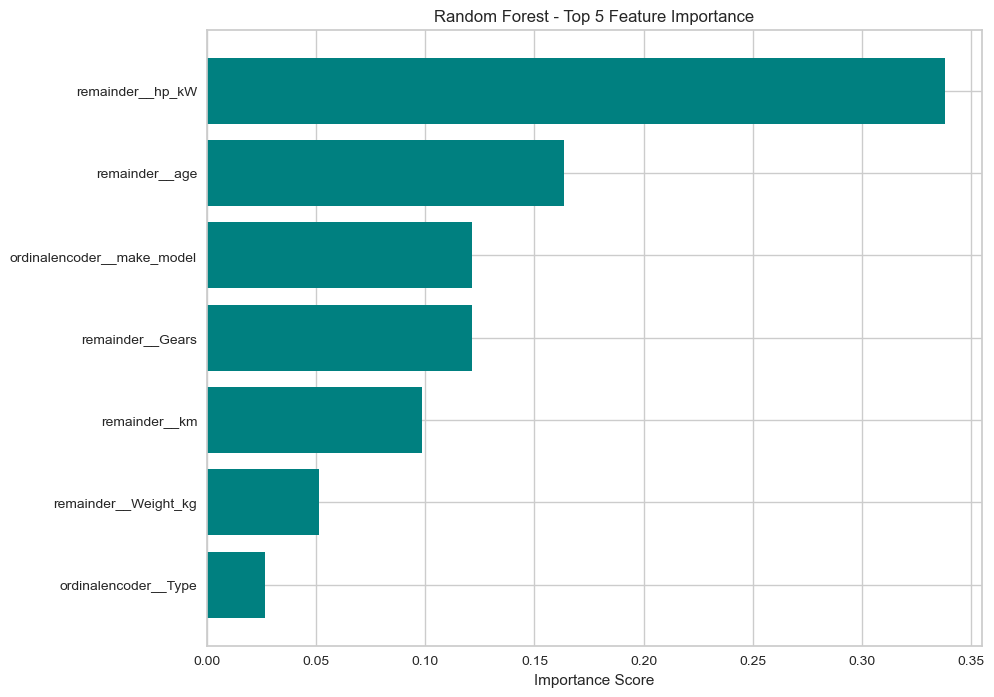

In [105]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=10,
                           n_estimators=100, max_depth=7)  

operations = [("encoder", column_trans), ("RF_model", rf)]
pipe_model_imp = Pipeline(steps=operations)
pipe_model_imp.fit(X_train_50, y_train_50)
pipe_model_imp.fit(X_train_50, y_train_50)

# rf.fit(X_train_transformed, y_train)                              
# pred = rf.predict(X_test_transformed)        
eval(pipe_model_imp, X_train_50, y_train_50, X_test_50, y_test_50)

feature_importances = pipe_model_imp.named_steps['RF_model'].feature_importances_
feature_names = pipe_model_imp.named_steps['encoder'].get_feature_names_out()

# Sort features based on importance
sorted_feature_importance = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)
features, importance = zip(*sorted_feature_importance)

# Extract feature names and their importance scores
# features, importance = zip(*sorted_feature_importance)
# feature_importances = rf.feature_importances_
# feature_names = X_train_transformed.columns  # Sort features based on importance
# sorted_feature_importance = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)
# Extract feature names and their importance scores
# features, importance = zip(*sorted_feature_importance)
# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 8))
plt.barh(features[:7], importance[:7], color='teal')
plt.title('Random Forest - Top 5 Feature Importance')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

In [112]:
features[:7]

('remainder__hp_kW',
 'remainder__age',
 'ordinalencoder__make_model',
 'remainder__Gears',
 'remainder__km',
 'remainder__Weight_kg',
 'ordinalencoder__Type')

In [123]:
X_imp_7f = price_50K[['hp_kW', 'age', 'make_model', "Gears",'km', 'Weight_kg','Type']]
y_imp_7f = price_50K.price

In [124]:
X_imp_7f

,hp_kW,age,make_model,Gears,km,Weight_kg,Type
0,66.000,3.000,Audi A1,7.000,56013.000,1220.000,Used
1,141.000,2.000,Audi A1,7.000,80000.000,1255.000,Used
2,85.000,3.000,Audi A1,7.000,83450.000,1135.000,Used
3,66.000,3.000,Audi A1,6.000,73000.000,1195.000,Used
4,66.000,3.000,Audi A1,7.000,16200.000,1135.000,Used
...,...,...,...,...,...,...,...
15907,118.000,0.000,Renault Espace,6.000,100.000,1734.000,Pre-registered
15908,147.000,0.000,Renault Espace,6.000,1647.363,1758.000,New
15909,165.000,0.000,Renault Espace,6.000,1000.000,1734.000,Demonstration
15911,165.000,0.000,Renault Espace,7.000,9900.000,1708.000,Used


In [125]:
imp_cat=['make_model','Type']
ord_enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
column_trans = make_column_transformer((ord_enc, imp_cat), remainder="passthrough")

In [126]:
X_train_imp, X_test_imp, y_train, y_test = train_test_split(X_imp_7f, y_imp_7f, test_size=0.2, random_state=42)

In [127]:
rf_imp_7f = RandomForestRegressor(bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=10,
                           n_estimators=100, max_depth=7)

operations = [("encoder", column_trans), ("RF_model", rf_imp_7f)]
pipe_model_imp_7f = Pipeline(steps=operations)
pipe_model_imp_7f.fit(X_train_imp, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['make_model', 'Type'])])),
                ('RF_model',
                 RandomForestRegressor(bootstrap=False, max_depth=7,
                                       max_features=0.5, min_samples_leaf=3,
                                       min_samples_split=10))])

In [128]:
eval(pipe_model_imp_7f, X_train_imp, y_train, X_test_imp, y_test)

,train,test
R2,0.913,0.909
mae,1404.111,1425.616
mse,4381964.249,4582237.620
rmse,2093.314,2140.616


In [129]:
operations = [("encoder", column_trans), ("RF_model", rf_imp_7f)]
pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model,
                        X_train_imp,
                        y_train,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'],
                        cv = 10,
                        return_train_score=True)

In [130]:
pd.DataFrame(scores)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                    0.905
train_r2                                   0.914
test_neg_mean_absolute_error           -1463.263
train_neg_mean_absolute_error          -1407.749
test_neg_mean_squared_error         -4809944.965
train_neg_mean_squared_error        -4374819.168
test_neg_root_mean_squared_error       -2191.768
train_neg_root_mean_squared_error      -2091.571
dtype: float64

In [ ]:
# five features

In [131]:
X_imp_5f = price_50K[['hp_kW', 'age', 'make_model', 'km',"Gears"]]
y_imp_5f = price_50K.price

In [134]:
imp_cat=['make_model']
ord_enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
column_trans = make_column_transformer((ord_enc, imp_cat), remainder="passthrough")

In [135]:
X_train_imp, X_test_imp, y_train, y_test = train_test_split(X_imp_5f, y_imp_5f, test_size=0.2, random_state=42)

In [136]:
rf_imp_5f = RandomForestRegressor(bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=10,
                           n_estimators=100, max_depth=7)

operations = [("encoder", column_trans), ("RF_model", rf_imp_5f)]
pipe_model_imp_5f = Pipeline(steps=operations)
pipe_model_imp_5f.fit(X_train_imp, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['make_model'])])),
                ('RF_model',
                 RandomForestRegressor(bootstrap=False, max_depth=7,
                                       max_features=0.5, min_samples_leaf=3,
                                       min_samples_split=10))])

In [137]:
eval(pipe_model_imp_5f, X_train_imp, y_train, X_test_imp, y_test)

,train,test
R2,0.905,0.904
mae,1460.796,1468.071
mse,4792155.440,4838587.740
rmse,2189.099,2199.679


In [138]:
operations = [("encoder", column_trans), ("RF_model", rf_imp_5f)]
pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model,
                        X_train_imp,
                        y_train,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'],
                        cv = 10,
                        return_train_score=True)

In [139]:
pd.DataFrame(scores)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                    0.897
train_r2                                   0.905
test_neg_mean_absolute_error           -1511.541
train_neg_mean_absolute_error          -1465.855
test_neg_mean_squared_error         -5190368.953
train_neg_mean_squared_error        -4814775.253
test_neg_root_mean_squared_error       -2277.167
train_neg_root_mean_squared_error      -2194.236
dtype: float64

# Before the Deployment


In [140]:
#since 7 features and 5 features had a close values and scores i will go with 5 features

In [141]:
column_trans_final = make_column_transformer((ord_enc, imp_cat), remainder="passthrough")
operations_final = [("encoder", column_trans), ("RF_model", RandomForestRegressor(bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=10,
                           n_estimators=100, max_depth=7))]

final_model = Pipeline(steps=operations_final)

In [142]:
final_model.fit(X_imp_5f, y_imp_5f)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['make_model'])])),
                ('RF_model',
                 RandomForestRegressor(bootstrap=False, max_depth=7,
                                       max_features=0.5, min_samples_leaf=3,
                                       min_samples_split=10))])

In [144]:
import joblib
joblib.dump(final_model, 'final_model_with_encoder.pkl')


['final_model_with_encoder.pkl']

In [145]:
loaded_pipeline = joblib.load('final_model_with_encoder.pkl')

In [155]:
new_data_df = pd.DataFrame([[65, 2, "Audi A1", 81000, 6]], columns=['hp_kW', 'age', 'make_model', 'km',"Gears"])

In [156]:
predictions = loaded_pipeline.predict(new_data_df)

In [157]:
predictions

array([15904.38073229])